# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, you will practice the 8 steps of an end-to-end ML project in the context of a **regression** problem in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

*BONUS POINTS:* 10 bonus points will be given (as Extra credits) for those who score among the top-10 performance while following strictly the assignment guidelines. Best of luck to all!

## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

# ANSWERS BELOW: 

- I intend to use linear regression model as this data is all tabular and we are trying to predict a price value which can vary by magnitudes. The problem is not classification because that required binary yes/no style predictions. Classification could be used to predict if a house will be greater than or less than a given threshold, but I believe regression to be more logical and fitting for the task. Clustering could be used to attempt to group together similarly priced/stat houses and visualization could certainly be useful when it comes to understanding the data.
- I expect the model to perform average or even below average upon first fitting and predicting. The fine-tuning process is where I expect to make most of my gains as machine learning and data science as a whole is about small incremental improvements. We can benefit from this model by understanding that it is just a model and that the price and value of a home can and often does have external factors that impact its magnitude.
- I intend to evaluate the model performance using the RMSE, MAE, and Cross-Validation.
- We should collect as much data as is physically possible, it is much easier to choose when to not use data than it is to find new data.
- Though I am not sure just yet, I expect that I will end up using an XGBoost model that utilizes Gradient Descent to minimize a loss function and tune the parameters such that the model is always chasing the "steepest" descent towards improved predictions.
- I expect a reasonably significant amount of effort here, it is often said you learn by doing so I am hoping that applies here.
- I plan to eventually have a vector of predictions, I will verify this using all methods available to me including Cross-Validation and the above mentioned performance evaluators as well as my own eyes to see the performance on a house by house basis.

In [11]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadTrainData():
  # The column names are adopted from the dataset page on Kaggle
  data = pd.read_csv('Files/train.csv')
  return data

def loadTestData():
    data = pd.read_csv('Files/test.csv')
    return data

In [19]:
housing= loadTrainData()

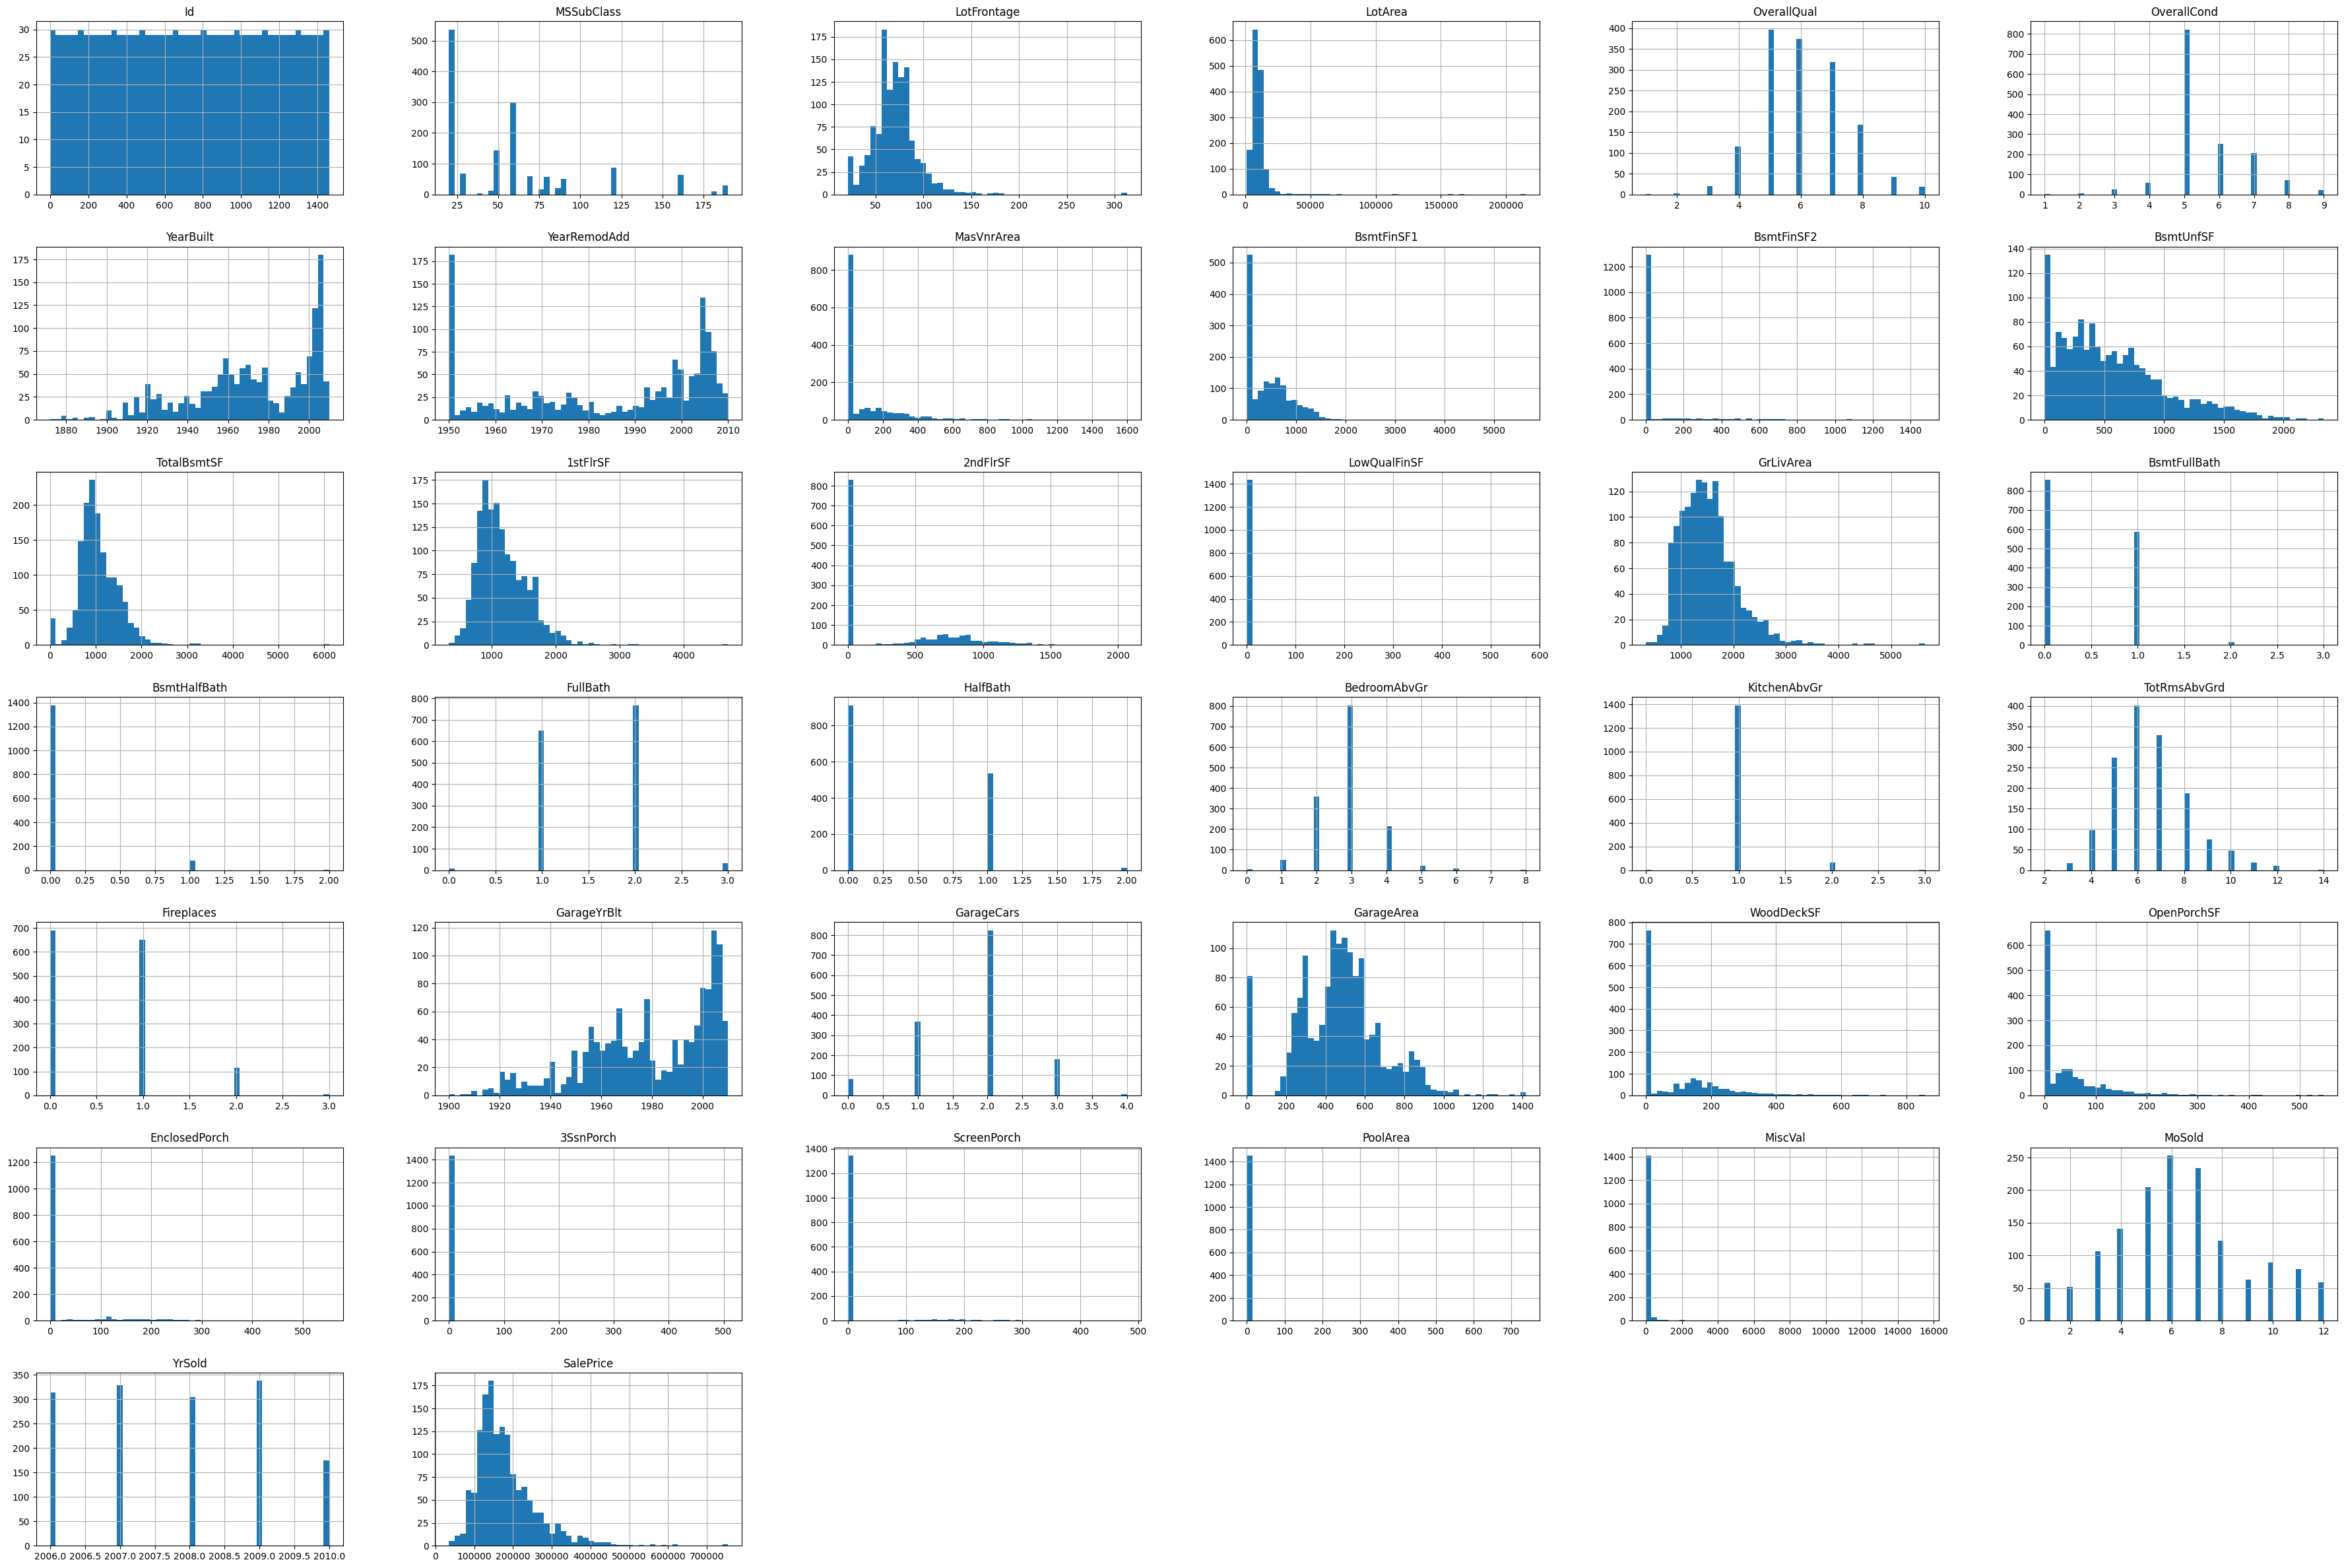

In [23]:
housing.hist(bins=50, figsize=(45,30))
plt.show()

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [ ]:
# Your code to visualize the data here

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [ ]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [ ]:
# Try a few models here



## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!